## Gradient Descent


Welcome! In this notebook, you will learn about Gradient Descent and Stochastic Gradient Descent (SGD) for optimizing a linear model. This assignment will guide you through the process of implementing these optimization algorithms and help you understand their underlying principles.

#### Instructions
- Do not modify any of the existing code.
- Only write code when prompted. For example, in some sections, you will find the following,
```
# TODO
```

Only modify those sections of the code.


You will learn to:

- Build a simple model
- Calculate Gradients for your model
- Build your own Gradient Descent Model
- Build your own Stocastic Gradient Descent Model

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from helper import *

# Introduction to Gradient Descent in NLP

Gradient Descent is an optimization algorithm used to minimize a cost function in machine learning models, particularly in NLP tasks. It works by iteratively adjusting model parameters in the direction that reduces the cost function the most.

The general update rule for Gradient Descent is:

$$
\theta^{(t+1)} = \theta^{(t)} - \alpha \frac{\partial J(\theta)}{\partial \theta^{(t)}}
$$

Where:
- The current parameter value is:
  $
  \theta^{(t)}
  $

- The learning rate is:
  $
  \alpha
  $

- The gradient of the cost function with respect to the parameters is:
  $
  \frac{\partial J(\theta)}{\partial \theta^{(t)}}
$

In [2]:
# Let's create our training data 12 pairs {x_i, y_i}
# We'll try to fit the straight line model to these data
data = np.array([[0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
                 [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]])

### Linear Model

To start with, let's create a simple linear model. From there we can proceed for both gradient descent and SGD.
In this model, we are predicting the output $ \ y_{\text{pred}} \ $ based on a simple linear relationship between the input $ \ x \ $ and two parameters: **intercept** $ \ \theta_0 \ $ and **slope** $ \ \theta_1 \ $.

The equation for the model is:

$$ \
y_{\text{pred}} = \theta_0 + \theta_1 \cdot x
\ $$

Where:
- $ \ \theta_0 \ $ is the **intercept** (the value of $ \ y \ $ when $ \ x = 0 \ $).
- $ \ \theta_1 \ $ is the **slope** (the rate at which $ \ y_{\text{pred}} \ $ changes with respect to $ \ x \ $).
- $ \ x \ $ is the input feature.

This is a simple linear regression model that fits a straight line to the data. The goal of training the model is to find the best values for $ \ \theta_0 \ $ and $ \ \theta_1 \ $ that minimize the difference between the predicted values ($ \ y_{\text{pred}} \ $) and the actual values in dataset.

In [3]:
# Let's define our model -- just a straight line with intercept theta[0] and slope theta[1]
def model(theta, x):
    y_pred = theta[0] + theta[1] * x
    return y_pred

#### Now let's visualize how the model looks like

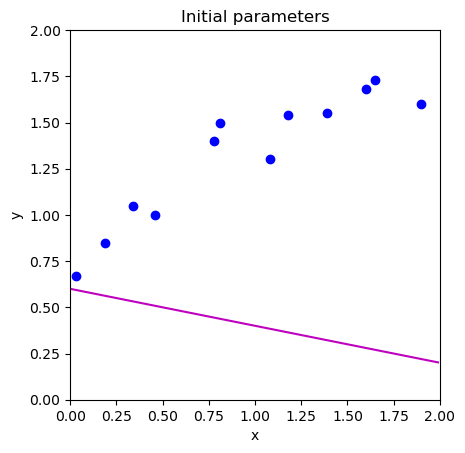

In [4]:
# Initialize the parameters to some arbitrary values and draw the model
theta = np.zeros((2, 1))
theta[0] = 0.6      # Intercept
theta[1] = -0.2     # Slope

# Draw the model with initial parameters
draw_model(data, model, theta, "Initial parameters")

Now let's compute the sum of squares loss for the training data, we have given compute_loss function to test that out
### Sum of Squares Loss Function:

The sum of squares loss function is given by:

$$
J(\theta) = \sum_{i=1}^{N} \left( y_{\text{pred}}^{(i)} - y_{\text{true}}^{(i)} \right)^2
$$


Where:
- $ \ y_{\text{pred}}^{(i)} = \theta_0 + \theta_1 x^{(i)} \ $ is the predicted value for the $ \ i\ $-th data point.
- $ \ y_{\text{true}}^{(i)} \ $ is the actual value for the \(i\)-th data point.
- $ \ N \ $ is the number of data points.



Let's just test that we got that right



In [5]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 12.367))

Your loss = 12.367, Correct loss = 12.367


Now let's plot the whole loss function

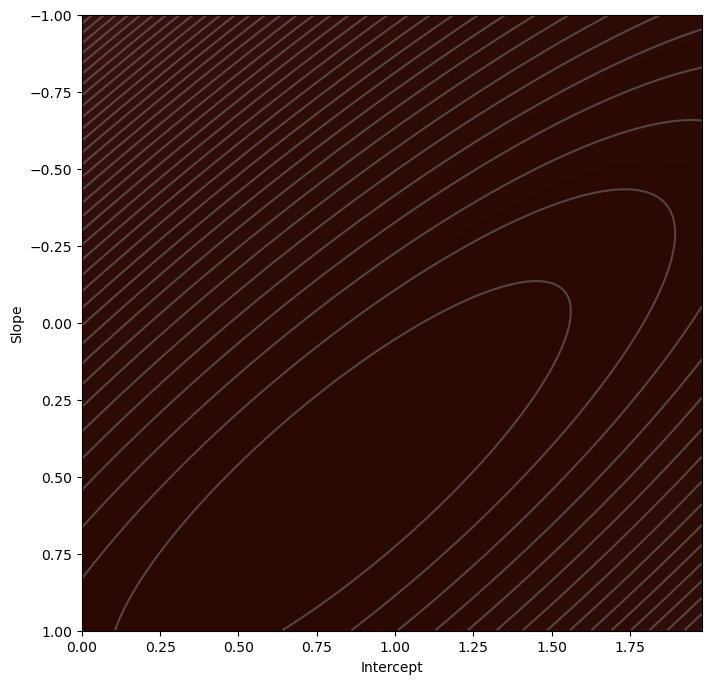

In [6]:
draw_loss_function(compute_loss, data, model)

This is basic plot of how your model's loss function looks like with respect to the sum of square loss and the data


### Gradient Calculation:

Now we need to compute the partial derivatives of the loss function with respect to $\ \theta_0 \ $ and $ \ \theta_1 \ $ (the intercept and slope, respectively).

#### Derivative with respect to $ \ \theta_0 \ $ (intercept):

$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{2}{N} \sum_{i=1}^{N} \left( y_{\text{pred}}^{(i)} - y_{\text{true}}^{(i)} \right)
$$


#### Derivative with respect to $ \ \theta_1 \ $ (slope):

$$
\frac{\partial J(\theta)}{\partial \theta_1} = \frac{2}{N} \sum_{i=1}^{N} \left( y_{\text{pred}}^{(i)} - y_{\text{true}}^{(i)} \right) x^{(i)}
$$


Where:
- $ \ y_{\text{pred}}^{(i)} = \theta_0 + \theta_1 x^{(i)} \ $ is the predicted value for the $ \ i\ $-th data point.
- $ \ x^{(i)} \ $ is the feature value for the $ \ i\ $-th data point.

In [7]:
def compute_gradient(data_x, data_y, theta):
    """
    Computes the gradient of the sum of squares loss function with respect to theta (parameters).
    
    Parameters:
    data_x : array-like
        Input feature data (independent variable).
    data_y : array-like
        True output data (dependent variable).
    theta : array-like
        Model parameters (weights: intercept and slope).
    
    Returns:
    gradient : array-like
        The gradient of the loss function with respect to theta_0 and theta_1.
    """
    
    # Number of data points
    N = len(data_x)
    
    # Model predictions: y_pred = theta[0] + theta[1] * x
    y_pred = theta[0] + theta[1] * data_x
    
    # Compute gradients
    dl_dtheta0 = (2 / N) * np.sum(y_pred - data_y)  # Derivative w.r.t. theta_0 (intercept)
    dl_dtheta1 = (2 / N) * np.sum((y_pred - data_y) * data_x)  # Derivative w.r.t. theta_1 (slope)
    
    # Return the gradient as a column vector
    return np.array([[dl_dtheta0], [dl_dtheta1]])

After this, let's see you got that right.
We should expect somewhere near these values
- Your gradients: (-1.825, -2.237)
- Approx gradients: (-21.903, -26.839)

In [8]:
# Compute the gradient using your function
gradient = compute_gradient(data[0,:], data[1,:], theta)
print("Your gradients: (%3.3f, %3.3f)" % (gradient[0], gradient[1]))

# Approximate the gradients with finite differences
delta = 0.0001

# Compute finite difference approximation for theta_0 (intercept)
dl_dtheta0_est = (compute_loss(data[0,:], data[1,:], model, theta + np.array([[delta], [0]])) - \
                  compute_loss(data[0,:], data[1,:], model, theta)) / delta

# Compute finite difference approximation for theta_1 (slope)
dl_dtheta1_est = (compute_loss(data[0,:], data[1,:], model, theta + np.array([[0], [delta]])) - \
                  compute_loss(data[0,:], data[1,:], model, theta)) / delta

print("Approx gradients: (%3.3f, %3.3f)" % (dl_dtheta0_est, dl_dtheta1_est))

# There might be small differences in the last significant figure because finite gradients is an approximation

Your gradients: (-1.825, -2.237)
Approx gradients: (-21.903, -26.839)


### Gradient Descent Step Explanation

The `gradient_descent_step` function performs one iteration of **Gradient Descent** to update the model parameters (intercept and slope) in order to minimize the loss function.

1. **Compute the Gradient**:
   - The gradient represents the direction and rate of the steepest increase in the loss function with respect to the model parameters.
   - The function `compute_gradient` is used to calculate this gradient.
   
   $ \text{gradient} = \frac{\partial J(\theta)}{\partial \theta} $
   
   Where:
   - $ J(\theta) $ is the loss function (e.g., Mean Squared Error).
   - $ \theta $ represents the model parameters (intercept and slope).

2. **Line Search for Optimal Step Size**:
   - We have included Line search function for you. The function takes in these parameter in order `line_search(data, model, parameter, gradient)`
   - The step size $ \alpha $ determines how far we move in the direction of the negative gradient.
   - The `line_search` function is used to find the optimal step size that minimizes the loss along the direction of the negative gradient $ \ (-\text{gradient}) \ $
   
   This ensures that we take an appropriate step size that reduces the loss function effectively.

3. **Update Parameters**:
   - Once we have computed the gradient and found the optimal step size, we update the parameters $ \theta $ by moving in the direction of the negative gradient (i.e., downhill).
   
   $ \theta = \theta + \alpha (-\text{gradient}) $
   
   This update rule ensures that we are moving towards minimizing the loss function.

#### Full Update Rule:

The complete update rule for Gradient Descent can be written as:

$$
\theta^{t+1} = \theta^t - \alpha \frac{\partial J(\theta)}{\partial \theta^t}
$$


Where:
- $ t $ represents the current iteration.
- $ J(\theta) $ is the cost function.
- $ \frac{\partial J(\theta)}{\partial \theta^t} $ is the gradient of $ J(\theta) $ with respect to $ \theta^t $.
- $ \alpha $ is a positive scalar known as the **learning rate** or **step size**.

In [9]:
def gradient_descent_step(theta, data, model):
    """
    Performs one step of gradient descent.

    Parameters:
    - theta: Current parameters (intercept and slope).
    - data: The dataset (x and y values).
    - model: The model used to make predictions.

    Returns:
    - Updated theta after one gradient descent step.
    """

    # Step 1: Compute the gradient (you wrote this function above)
    gradient = compute_gradient(data[0, :], data[1, :], theta)

    # Step 2: Find the best step size alpha using line search function (above)
    # Use negative gradient as we are going downhill
    alpha = line_search(data, model, theta, -gradient)

    # Step 3: Update the parameters theta based on the gradient and step size alpha
    theta = theta + alpha * (-gradient)

    return theta

Let's see if you got that right, run the below cell and for the final iteration your loss should be approximately 1.8

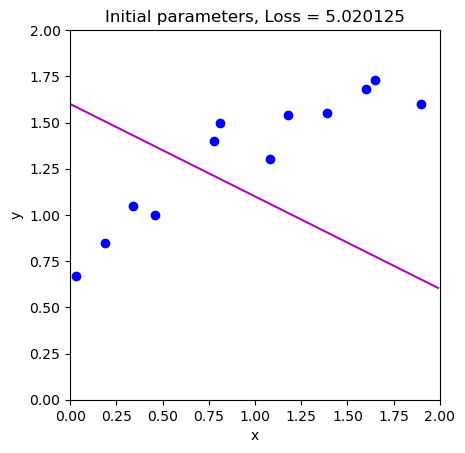

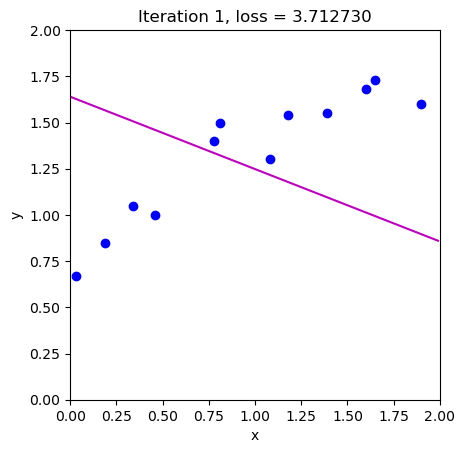

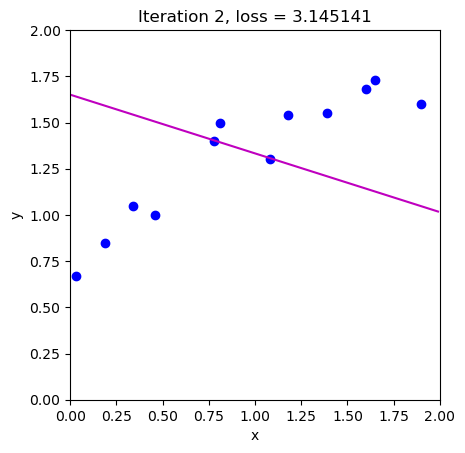

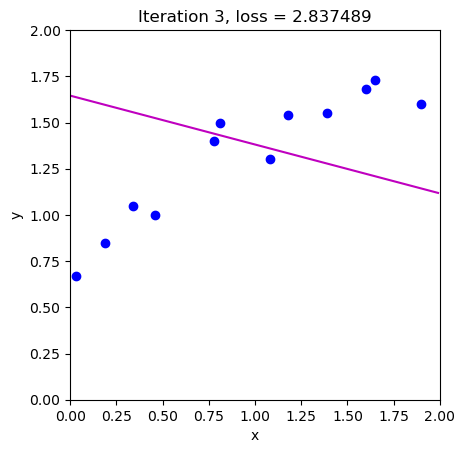

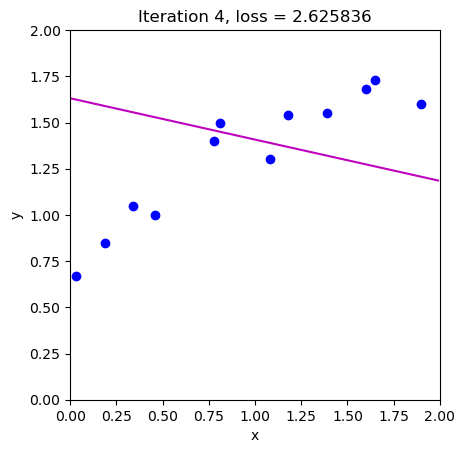

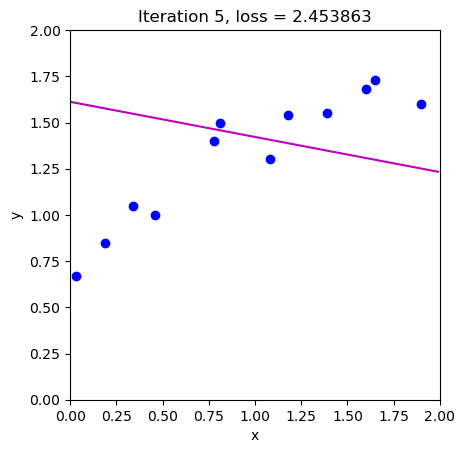

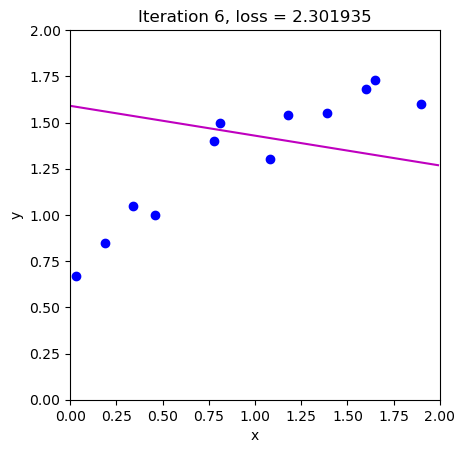

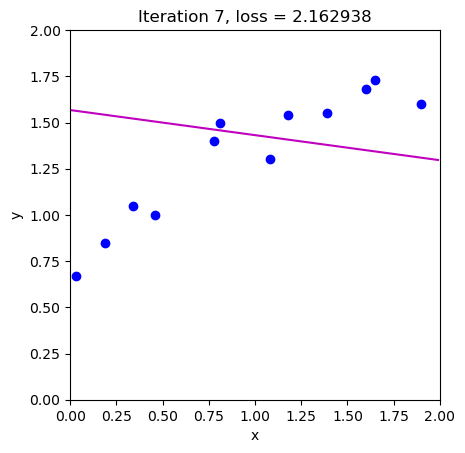

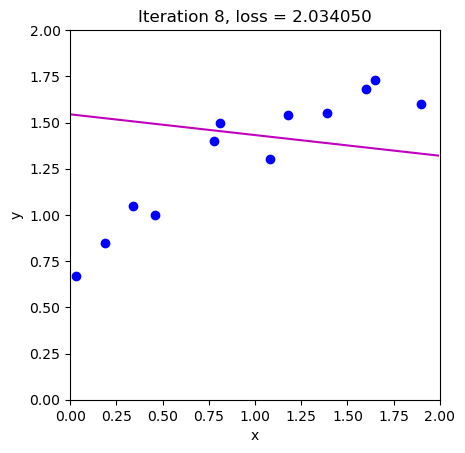

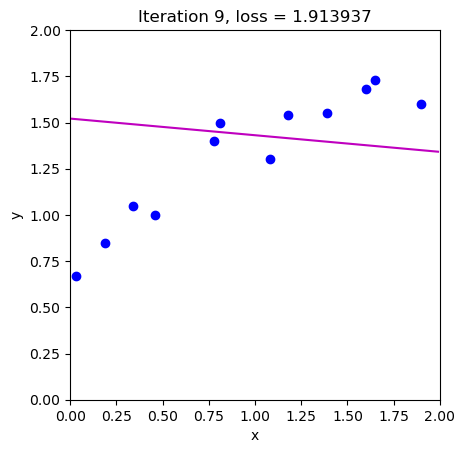

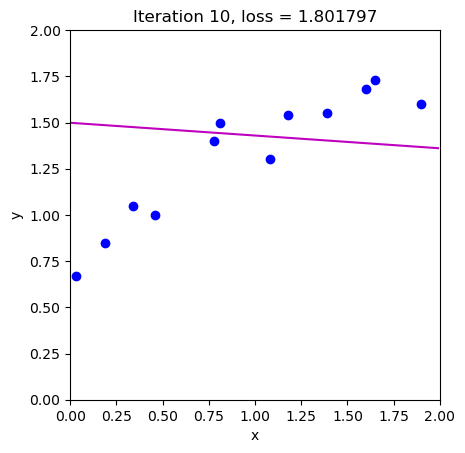

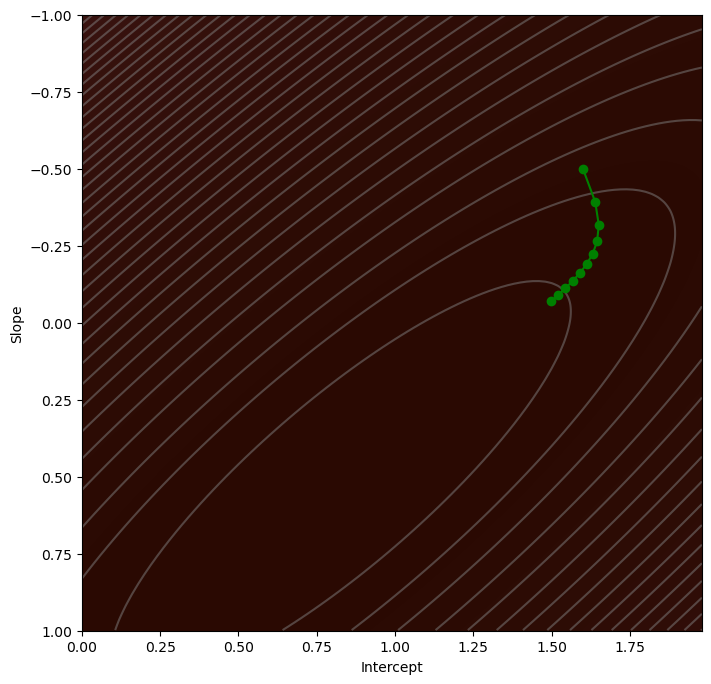

In [10]:
# Initialize the parameters and draw the model
n_steps = 10
theta_all = np.zeros((2, n_steps + 1))
theta_all[0, 0] = 1.6  # Initial intercept
theta_all[1, 0] = -0.5  # Initial slope

# Measure loss and draw initial model
loss = compute_loss(data[0, :], data[1, :], model, theta_all[:, 0:1])
draw_model(data, model, theta_all[:, 0:1], "Initial parameters, Loss = %f" % (loss))

# Repeatedly take gradient descent steps
for c_step in range(n_steps):
    # Do gradient descent step
    theta_all[:, c_step+1:c_step+2] = gradient_descent_step(theta_all[:, c_step:c_step+1], data, model)
    
    # Measure loss and draw model
    loss = compute_loss(data[0, :], data[1, :], model, theta_all[:, c_step+1:c_step+2])
    draw_model(data, model, theta_all[:, c_step+1], "Iteration %d, loss = %f" % (c_step + 1, loss))

# Draw the trajectory on the loss function
draw_loss_function(compute_loss, data, model, theta_all)

### Stochastic Gradient Descent Step Explanation

The `stochastic_gradient_descent_step` function performs one iteration of **Stochastic Gradient Descent (SGD)** to update the model parameters (intercept and slope) in order to minimize the loss function.


1. **Shuffle the Data**:
    - The data is shuffled to ensure that the model does not learn in a specific order, which helps in better generalization.

2. **Iterate Over Each Data Point**:
    - For each data point in the shuffled dataset, the following steps are performed:

3. **Compute the Gradient**:
    - The gradient represents the direction and rate of the steepest increase in the loss function with respect to the model parameters.
    - The function `compute_gradient` is used to calculate this gradient for the current data point.

    $ \text{gradient} = \frac{\partial J(\theta)}{\partial \theta} $

    Where:
    - $ J(\theta) $ is the loss function.
    - $ \theta $ represents the model parameters (intercept and slope).

4. **Update Parameters**:
    - The parameters $ \theta $ are updated based on the gradient and the learning rate.
    - The update rule is:

    $ \theta = \theta - \text{learning\_rate} \times \text{gradient} $

    This update rule ensures that we are moving towards minimizing the loss function.

#### Full Update Rule:

The complete update rule for Stochastic Gradient Descent can be written as:

$$
\theta^{t+1} = \theta^t - \alpha \frac{\partial J(\theta)}{\partial \theta^t}
$$

Where:
- $ t $ represents the current iteration.
- $ J(\theta) $ is the cost function.
- $ \frac{\partial J(\theta)}{\partial \theta^t} $ is the gradient of $ J(\theta) $ with respect to $ \theta^t $.
- $ \alpha $ is a positive scalar known as the **learning rate**.

In [11]:
def stochastic_gradient_descent_step(theta, data, model, learning_rate=0.01):
    """
    Performs one step of stochastic gradient descent.

    Parameters:
    - theta: Current parameters (intercept and slope).
    - data: The dataset (x and y values).
    - model: The model used to make predictions.
    - learning_rate: The learning rate for SGD.

    Returns:
    - Updated theta after one stochastic gradient descent step.
    """
    # Shuffle the data
    indices = np.random.permutation(data.shape[1])
    data_shuffled = data[:, indices]

    for i in range(data.shape[1]):
        x_i = data_shuffled[0, i]
        y_i = data_shuffled[1, i]

        # Compute the gradient for the current data point
        gradient = compute_gradient(np.array([x_i]), np.array([y_i]), theta)

        # Update the parameters theta based on the gradient and learning rate
        theta = theta - learning_rate * gradient

    return theta


Let's see if you got that right, run the below cell and for the final iteration your loss should be approximately 1.6

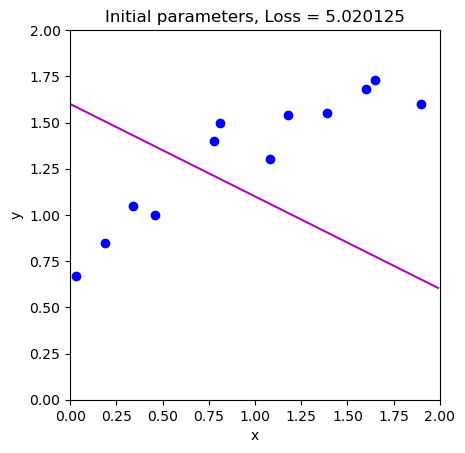

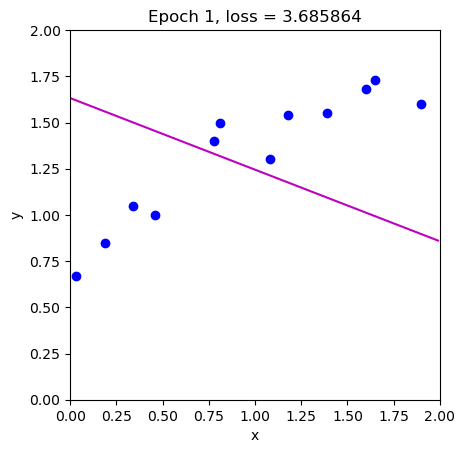

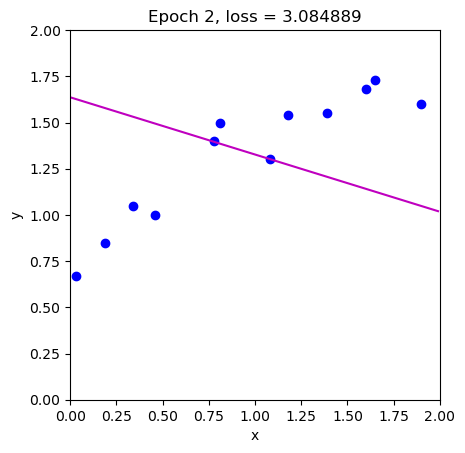

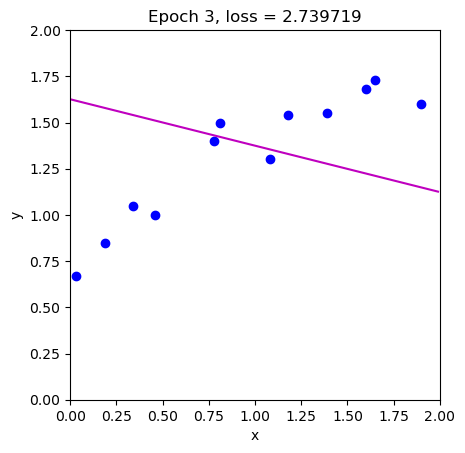

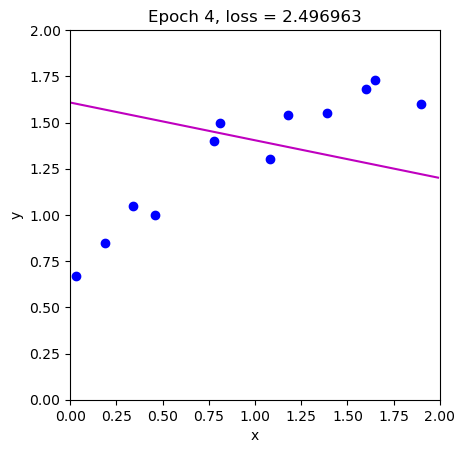

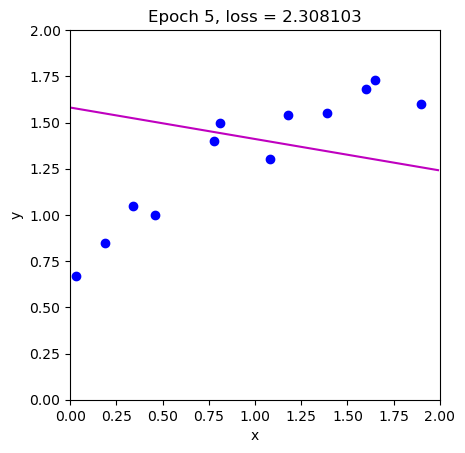

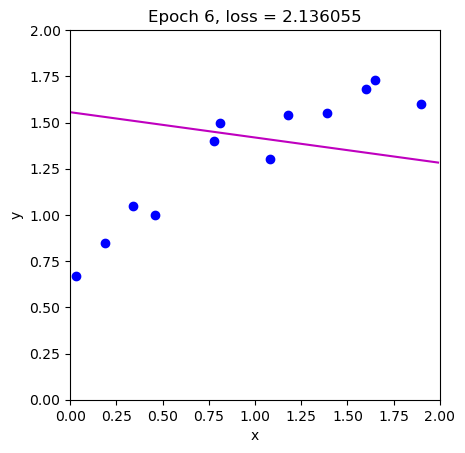

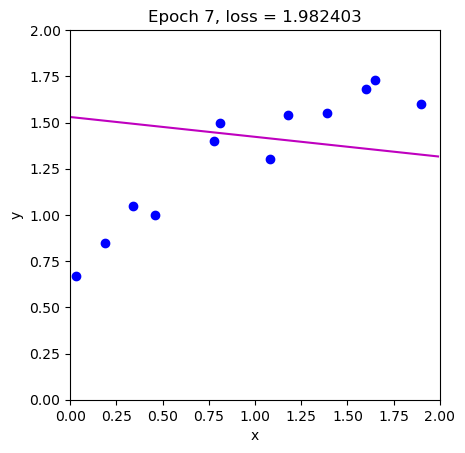

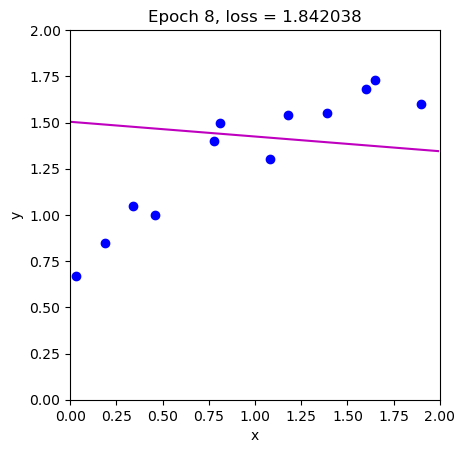

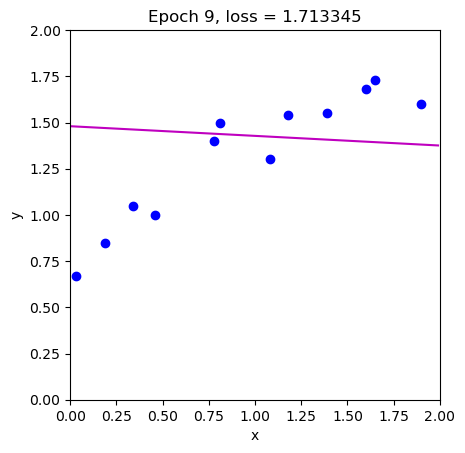

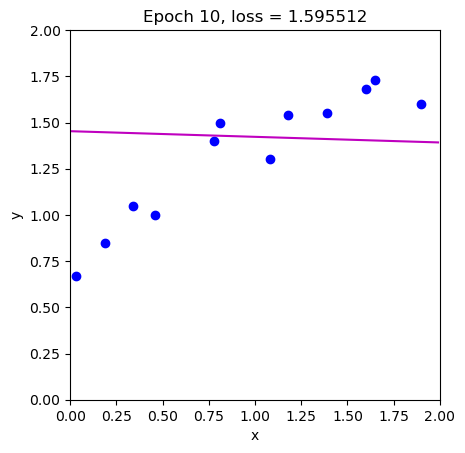

In [13]:
# Initialize the parameters and draw the model
n_epochs = 10
theta_sgd = np.zeros((2, 1))
theta_sgd[0] = 1.6  # Initial intercept
theta_sgd[1] = -0.5  # Initial slope

# Measure loss and draw initial model
loss = compute_loss(data[0, :], data[1, :], model, theta_sgd)
draw_model(data, model, theta_sgd, "Initial parameters, Loss = %f" % (loss))

# Repeatedly take stochastic gradient descent steps
for epoch in range(n_epochs):
    # Do stochastic gradient descent step
    theta_sgd = stochastic_gradient_descent_step(theta_sgd, data, model)

    # Measure loss and draw model
    loss = compute_loss(data[0, :], data[1, :], model, theta_sgd)
    draw_model(data, model, theta_sgd, "Epoch %d, loss = %f" % (epoch + 1, loss))


## Key Takeaways
In this Lab we learned about Stochastic Gradient Descent (SGD) and how it can be used to optimize a model by updating the parameters based on the gradient of the loss function. 
The key takeaways from this lab are:

1. **Gradient Descent**:
    - Gradient Descent is an optimization algorithm used to minimize a cost function by iteratively adjusting model parameters.
    - The update rule for Gradient Descent is: 
      $$
      \theta^{(t+1)} = \theta^{(t)} - \alpha \frac{\partial J(\theta)}{\partial \theta^{(t)}}
      $$
    - The notebook demonstrates how to compute gradients and perform gradient descent steps to minimize the loss function.

2. **Linear Model**:
    - A simple linear model is used to predict the output based on a linear relationship between the input and two parameters: intercept ($\theta_0$) and slope ($\theta_1$).
    - The equation for the model is: 
      $$
      y_{\text{pred}} = \theta_0 + \theta_1 \cdot x
      $$

3. **Loss Function**:
    - The sum of squares loss function is used to measure the difference between the predicted values and the actual values.
    - The loss function is given by:
      $$
      J(\theta) = \sum_{i=1}^{N} \left( y_{\text{pred}}^{(i)} - y_{\text{true}}^{(i)} \right)^2
      $$

4. **Stochastic Gradient Descent (SGD)**:
    - SGD is a variant of Gradient Descent where the model parameters are updated for each data point, rather than the entire dataset.
    - The update rule for SGD is:
      $$
      \theta^{t+1} = \theta^t - \alpha \frac{\partial J(\theta)}{\partial \theta^t}
      $$


For a better understanding on how Stochastic Gradient Descent works, you can refer to the https://github.com/udlbook/udlbook/blob/main/Notebooks/Chap06/6_3_Stochastic_Gradient_Descent.ipynb. 

In the above given notebook they have used Gabor model to explain the Stochastic Gradient Descent.
$$